#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [53]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DELL\_netrc
wandb: Currently logged in as: avantika-bansal (avantika-bansal-plaksha) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

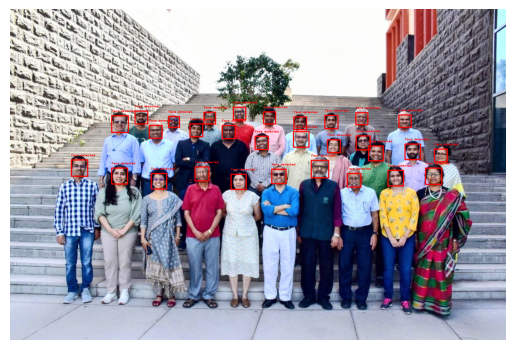

In [38]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
# img = cv2.resize(img, (800, 600))  
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))
 
# Define the text and font parameters
text = "Face detected" 
font = cv2.FONT_HERSHEY_PLAIN  
font_scale = 0.5  
font_color = (0, 0, 255) 
font_thickness = 1  
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

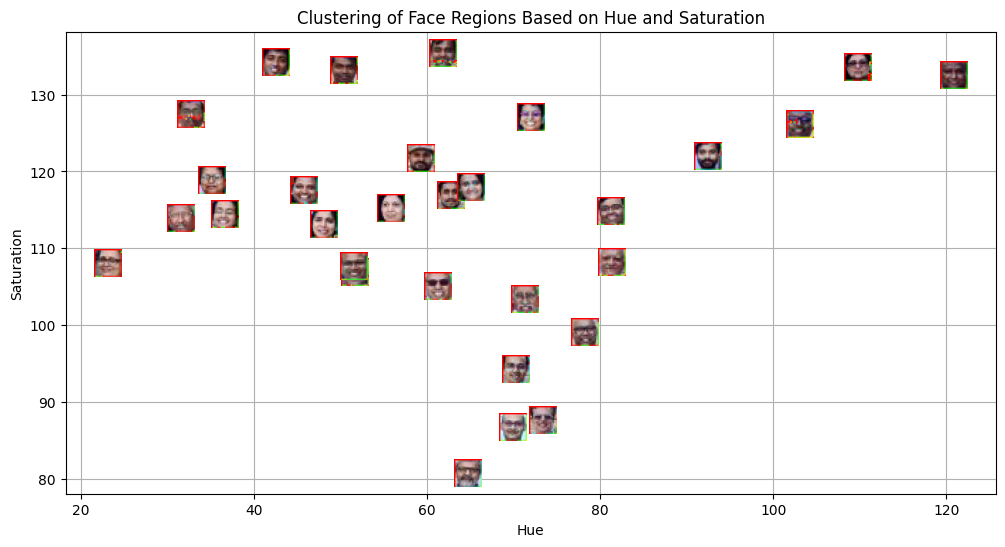

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel("Hue")  
plt.ylabel("Saturation")  
plt.title("Clustering of Face Regions Based on Hue and Saturation")  
plt.grid(True)  
plt.show()  

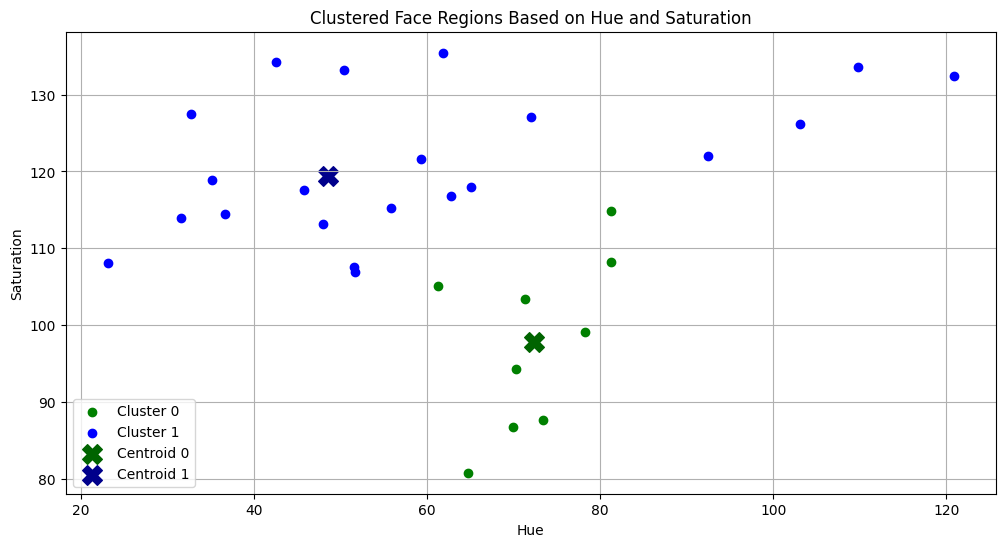

In [43]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='darkgreen', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='darkblue', marker='X', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Face Regions Based on Hue and Saturation")
plt.legend()
plt.grid(True)
plt.show()


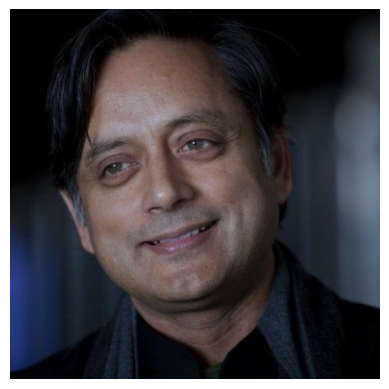

In [44]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face  in the template image after converting it to gray and store it in template_faces
gray_temp = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_temp, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Show the image
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()    

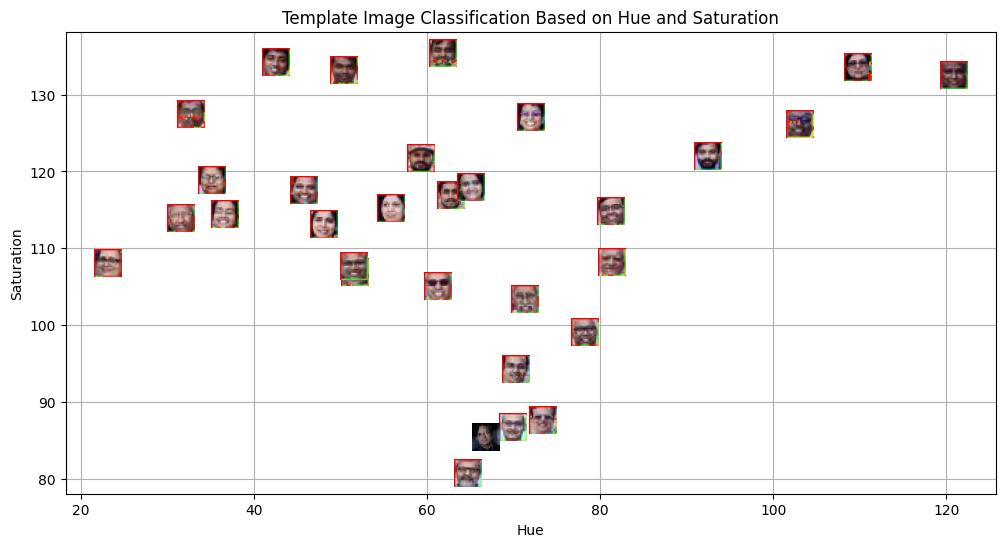

In [48]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
color = 'red' if template_label == 0 else 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Image Classification Based on Hue and Saturation")
plt.grid(True)
plt.show()


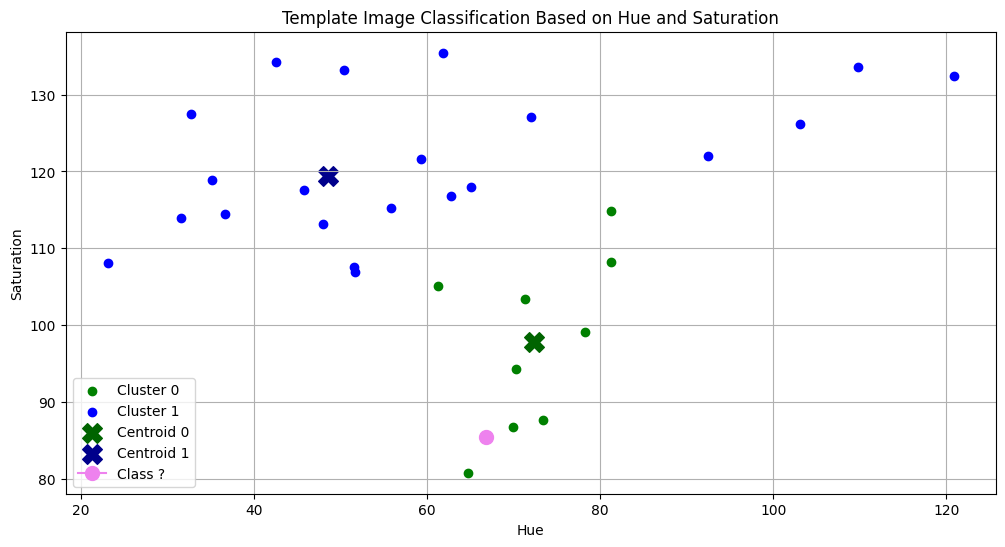

In [51]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], color='darkgreen', marker='X', s=200, label='Centroid 0')  ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='darkblue', marker='X', s=200, label='Centroid 1')  ## plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Image Classification Based on Hue and Saturation")
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

In [ ]:
wandb.init(project="distance_classification_project", name="experiment_1")
# plt.savefig("output_image.png")  # Save the image locall

In [55]:
wandb.init(project='distance_classification_project')

wandb.log({"Number of Faces Detected": len(faces_rect)})
wandb.log({"Detected Faces Image": wandb.Image(img)})

wandb.log({"Cluster 0 Size": sum(kmeans.labels_ == 0)})
wandb.log({"Cluster 1 Size": sum(kmeans.labels_ == 1)})
wandb.log({"Cluster Centers": kmeans.cluster_centers_})

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    plt.scatter(hue_saturation[i, 0], hue_saturation[i, 1], c=color)

wandb.log({"Clustering Plot": wandb.Image(fig)})
plt.close(fig)

wandb.log({"Template Hue": template_hue})
wandb.log({"Template Saturation": template_saturation})
wandb.log({"Template Cluster Label": template_label})
wandb.log({"Template Image": wandb.Image(template_img)})

fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0")
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label="Cluster 1")
plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='X', s=100, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=100, label="Centroid 1")
plt.scatter(template_hue, template_saturation, c='violet', marker='o', s=100, label="Template")

wandb.log({"Final Classification Plot": wandb.Image(fig)})
plt.close(fig)

wandb.finish()

Cluster 0 Size,▁
Cluster 1 Size,▁
Number of Faces Detected,▁
Template Cluster Label,▁
Template Hue,▁
Template Saturation,▁
Cluster 0 Size,9
Cluster 1 Size,17
Number of Faces Detected,30
Template Cluster Label,0
Template Hue,66.78056


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
- Euclidean distance, Mahalanobis distance, Manhattan distance, Chebyshev distance, Minkowski distance, Hamming distnace, Cosine distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
- Customer Behavior Prediction, Document Classification, Spam Filtering, Image Classification, Face Recognition,Product Categorization, Malware Categorization, Image Sentiment Analysis, Emotion Classification, Anomaly and Fraud Detection, Credit Worthiness Assessment

#### 3. Explain various distance metrics. 
- Euclidean distance: represents the shortest distance between two vectors
- Mahalanobis distance: measures how many standard deviations away a point P is from the mean of the distribution D
- Manhattan distance: represents distance between two points measured along axes at right angles
- Chevyshev distance: represents distance between two vectors that is the greatest of their differences along any coordinate dimension
- Minkowski distance: A generalized distance metric which can be modified by substituting the value of ‘p’ to calculate the distance between two points.
-  Cosine distnace: measures degree of angle between two vectors
- Hamming distance: Measures the minimum number of substitutions required to change one string into the other 

#### 4. What is the role of cross validation in model performance? 
- N cross validation helps take random instances of the data to use as validation set and evaluate the performance of the model

#### 5. Explain variance and bias in terms of KNN? 
- Bias and variance are parameters of how well the model fits the dataset. A high value of K increases bias while a low value of K increases variance.